In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")
X=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
from sklearn.preprocessing  import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train) 
#here learn and transform because its training data- you will make the model learn from this data
X_test=sc_X.transform(X_test)

/home/sois/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix #metrics is a measurement method which is not a machinelearning class
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

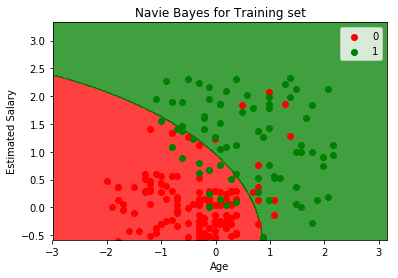

In [9]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()+1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
         alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label=j)
    
plt.title("Navie Bayes for Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()



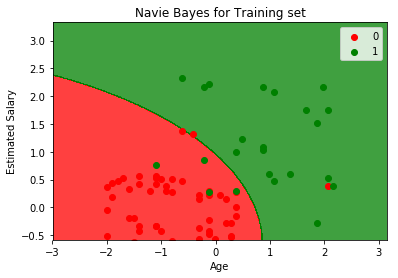

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()+1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
         alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label=j)
    
plt.title("Navie Bayes for Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

